In [1]:
import cv2

In [2]:
imagePath = "stop-taking-blurry-pictures.jpg"
image = cv2.imread(imagePath)

In [3]:
cv2.Laplacian(image, cv2.CV_64F).var()

71.21036665142604

In [4]:
imagePath = "African_Bush_Elephant.jpg"
image = cv2.imread(imagePath)
cv2.Laplacian(image, cv2.CV_64F).var()

1100.174164069044

In [5]:
blur_image = cv2.GaussianBlur(image, (1,1), 0)

In [6]:
cv2.Laplacian(blur_image, cv2.CV_64F).var()

1100.174164069044

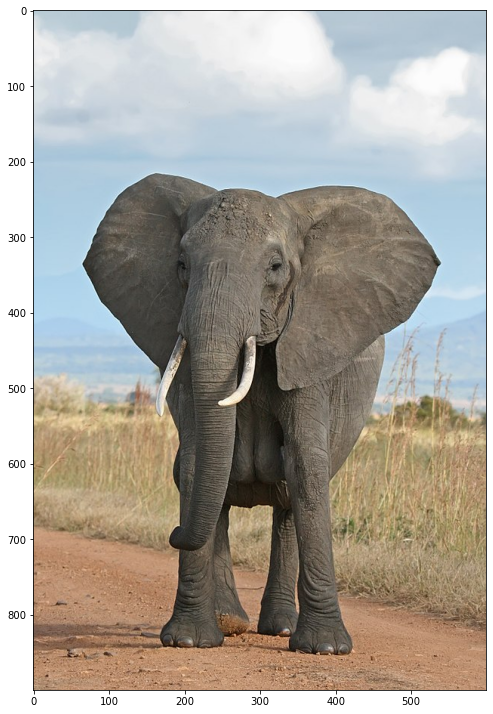

In [7]:
from matplotlib import pyplot as plt
import matplotlib 
dpi = matplotlib.rcParams['figure.dpi']
height, width, depth = image.shape
figsize = width / float(dpi), height / float(dpi)
plt.figure(figsize=figsize)
plt.imshow(cv2.cvtColor(blur_image, cv2.COLOR_BGR2RGB))
plt.show()

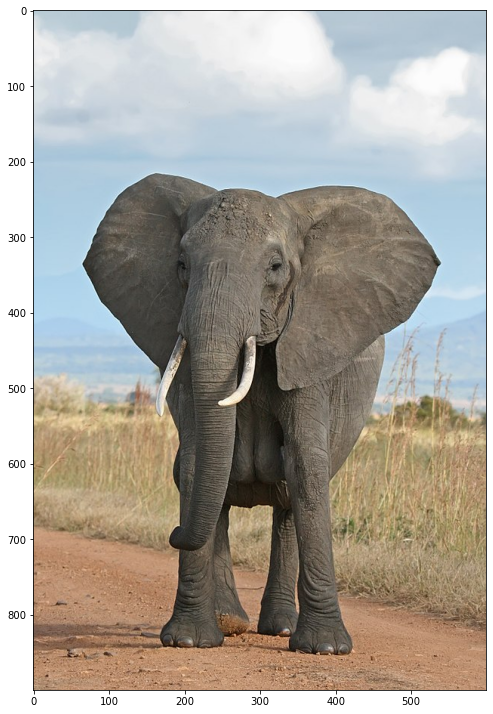

In [8]:
height, width, depth = image.shape
figsize = width / float(dpi), height / float(dpi)
plt.figure(figsize=figsize)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
import cv2
import numpy as np

# read image
#img = cv2.imread("African_Bush_Elephant.jpg")
img = cv2.GaussianBlur(cv2.imread("stop-taking-blurry-pictures.jpg"), (1,1), 0)
# convert to LAB color space
lab = cv2.cvtColor(img,cv2.COLOR_BGR2LAB)

# separate channels
L,A,B=cv2.split(lab)

# compute minimum and maximum in 5x5 region using erode and dilate
kernel = np.ones((5,5),np.uint8)
min = cv2.erode(L,kernel,iterations = 1)
max = cv2.dilate(L,kernel,iterations = 1)

# convert min and max to floats
min = min.astype(np.float64) 
max = max.astype(np.float64) 

# compute local contrast
contrast = (max-min)/(max+min)

# get average across whole image
average_contrast = 100*np.mean(contrast)

print(str(average_contrast)+"%")



6.913221698858174%


In [10]:
img = cv2.imread("stop-taking-blurry-pictures.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hsv

array([[[103, 181, 201],
        [103, 181, 202],
        [103, 180, 203],
        ...,
        [102, 255, 170],
        [102, 255, 166],
        [102, 253, 164]],

       [[103, 181, 202],
        [103, 181, 202],
        [103, 180, 203],
        ...,
        [102, 255, 171],
        [102, 255, 166],
        [102, 253, 164]],

       [[103, 181, 202],
        [103, 180, 203],
        [103, 179, 204],
        ...,
        [102, 255, 171],
        [102, 255, 167],
        [102, 253, 166]],

       ...,

       [[103, 229,  88],
        [103, 229,  88],
        [103, 226,  89],
        ...,
        [105, 250,  55],
        [104, 250,  53],
        [104, 250,  53]],

       [[102, 234,  84],
        [102, 231,  85],
        [102, 231,  85],
        ...,
        [105, 250,  52],
        [105, 250,  54],
        [105, 250,  54]],

       [[101, 233,  82],
        [101, 230,  83],
        [102, 231,  85],
        ...,
        [105, 250,  52],
        [105, 250,  54],
        [105, 250,  54]]

In [11]:
hsv[...,2].mean()

155.78223870755028

In [12]:
hsv[...,2].max()

255

In [13]:
hsv[...,2].min()

0

In [14]:
import skimage.exposure

In [15]:
skimage.exposure.is_low_contrast(img, fraction_threshold=0.40)

False

In [16]:
skimage.exposure.histogram(img)

/home/jyao/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  """Entry point for launching an IPython kernel.


(array([7296, 3232, 2265, 1642, 1297, 1124, 1117, 1093, 1124, 1096, 1173,
        1080, 1290, 1191, 1216, 1200, 1357, 1356, 1409, 1558, 1670, 1742,
        1597, 1642, 1772, 2018, 2122, 2093, 2273, 2324, 2299, 2568, 2538,
        2840, 2829, 2968, 3286, 3600, 3644, 3656, 3637, 3808, 3980, 4239,
        4336, 4283, 4570, 4930, 4862, 4921, 4759, 4644, 4672, 4805, 4649,
        4565, 4604, 4632, 4685, 4606, 4555, 4477, 4933, 4808, 5284, 5182,
        5262, 5288, 5403, 5220, 5405, 5437, 5349, 5208, 5343, 5332, 5195,
        5306, 5111, 5161, 5267, 5385, 5359, 5316, 5195, 4775, 4808, 4882,
        4657, 5131, 4902, 4806, 4921, 5204, 5108, 5267, 5324, 5445, 5414,
        5343, 5209, 5425, 5424, 5145, 5438, 5204, 5166, 4964, 5096, 5005,
        5119, 4839, 4973, 4883, 5016, 5206, 5318, 4693, 4083, 4202, 3894,
        3758, 3629, 3664, 3918, 4084, 4078, 4113, 4076, 3878, 4037, 3974,
        4108, 4012, 4013, 4129, 4503, 4371, 4495, 3972, 3788, 3708, 3817,
        3861, 4420, 3584, 3062, 3209, 

In [17]:
a = skimage.exposure.cumulative_distribution(img)[0]

/home/jyao/miniconda3/envs/pytorch/lib/python3.7/site-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


In [18]:
from matplotlib import pyplot as plt

(array([43., 20., 17., 17., 18., 22., 25., 26., 31., 37.]),
 array([0.00801846, 0.10721662, 0.20641477, 0.30561292, 0.40481108,
        0.50400923, 0.60320739, 0.70240554, 0.80160369, 0.90080185,
        1.        ]),
 <a list of 10 Patch objects>)

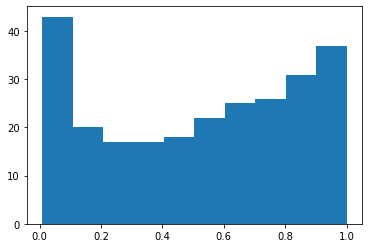

In [19]:
plt.hist(a)

In [20]:
sum(skimage.exposure.cumulative_distribution(img)[0] < 0.45)

105

In [21]:
skimage.exposure.cumulative_distribution(img)

(array([0.00801846, 0.0115705 , 0.01405979, 0.01586438, 0.01728981,
        0.01852511, 0.01975272, 0.02095395, 0.02218925, 0.02339378,
        0.02468293, 0.02586988, 0.02728761, 0.02859655, 0.02993296,
        0.03125179, 0.03274316, 0.03423343, 0.03578195, 0.03749423,
        0.0393296 , 0.04124409, 0.04299923, 0.04480382, 0.04675129,
        0.04896912, 0.05130124, 0.05360149, 0.05609957, 0.0586537 ,
        0.06118035, 0.06400264, 0.06679196, 0.06991318, 0.07302231,
        0.07628421, 0.07989559, 0.08385207, 0.08785691, 0.09187493,
        0.09587207, 0.10005715, 0.10443126, 0.10909001, 0.11385537,
        0.11856248, 0.12358501, 0.12900319, 0.13434663, 0.13975492,
        0.14498516, 0.15008902, 0.15522365, 0.16050445, 0.1656138 ,
        0.17063084, 0.17569074, 0.1807814 , 0.18593032, 0.19099242,
        0.19599846, 0.20091878, 0.20634026, 0.21162435, 0.21743159,
        0.22312672, 0.22890977, 0.2347214 , 0.24065941, 0.24639631,
        0.25233652, 0.2583119 , 0.26419057, 0.26

In [28]:
imagePath = "African_Bush_Elephant.jpg"
img = cv2.imread(imagePath)

low_contrast = False
threshold = 0
while not low_contrast:
    threshold = threshold + 0.025
    low_contrast = skimage.exposure.is_low_contrast(img, fraction_threshold=threshold)


In [34]:
round(threshold, 3)

0.45